# Sampling the parameters of each neuron during training
for estimation of empirical distribution

In [1]:
# Import libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [30]:
# Set Batch size
# Each batch will give one sample of the parameters
BATCH_SIZE = 8

In [31]:
# Load dataset
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

## One-layer neural network

In [39]:
# One-layer neural network
D_in = X.shape[1] # input dimension
print("Input data dim =",D_in)
D_out = 4 # number of neurons (outputs)
model = nn.Linear(D_in, D_out)
# Loss for 4 class classification
criterion = nn.MSELoss() # FIXIT
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Input data dim = 4


In [41]:
# Store the  parameters
# One list per neuron
neuron_params = {j: [] for j in range(D_out)} # neuron_params[j] will be a list of parameter vectors

In [42]:
epochs = 2

for epoch in range(epochs):
    for xb, yb in dataloader:
        preds = model(xb)
        loss = criterion(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Extract parameters
        W = model.weight.data      # [D_out, D_in]
        b = model.bias.data        # [D_out]

        for j in range(D_out):
            param_vector = torch.cat([W[j], b[j].unsqueeze(0)])
            neuron_params[j].append(param_vector.clone())

In [43]:
# Convert lists to matrices
# Each entry is now a tensor of shape [num_minibatches, D_in + 1]
neuron_param_matrices = {
    j: torch.stack(neuron_params[j], dim=0)
    for j in range(D_out)
}

In [44]:
# Display shapes
for j, mat in neuron_param_matrices.items():
    print(f"Neuron {j} parameter matrix shape: {mat.shape}")
    print(mat[:3])  # first 3 minibatches

Neuron 0 parameter matrix shape: torch.Size([38, 5])
tensor([[-0.0517, -0.3322, -0.1443,  0.2758, -0.3271],
        [ 0.9655,  0.1390,  0.6758,  0.5679, -0.1610],
        [-1.7043, -1.1324, -1.3369, -0.1709, -0.5951]])
Neuron 1 parameter matrix shape: torch.Size([38, 5])
tensor([[-0.0624, -0.4472, -0.1271, -0.1605, -0.3976],
        [ 1.2930,  0.1834,  0.9653,  0.2301, -0.1764],
        [-2.2511, -1.5039, -1.7066, -0.7501, -0.7526]])
Neuron 2 parameter matrix shape: torch.Size([38, 5])
tensor([[ 0.9787,  0.3224,  1.0947,  0.3452, -0.0234],
        [-2.4013, -1.2577, -1.5821, -0.6012, -0.5766],
        [ 6.2961,  2.8715,  5.0145,  1.8320,  0.8376]])
Neuron 3 parameter matrix shape: torch.Size([38, 5])
tensor([[-0.5126, -0.1686, -0.6336,  0.2030,  0.1439],
        [ 1.8198,  0.9050,  1.2463,  0.8710,  0.5238],
        [-4.2771, -2.0044, -3.3438, -0.8161, -0.4689]])


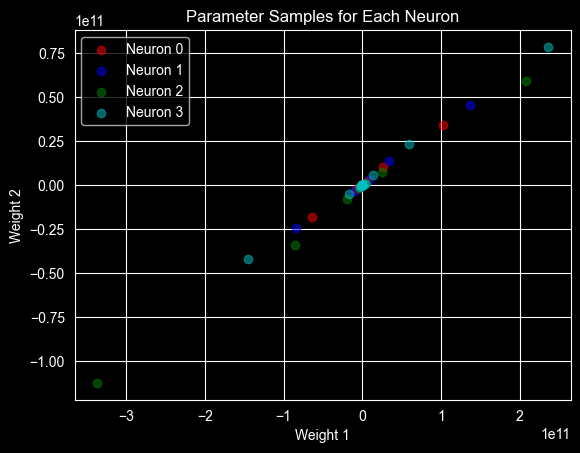

In [45]:
# Plot 2D projections of the parameter samples for each neuron in one plot marked by colors
import matplotlib.pyplot as plt
plt.figure()
colors = ['r', 'b', 'g', 'c', 'm', 'y']

for j, mat in neuron_param_matrices.items():
    plt.scatter(mat[:, 2].numpy(), mat[:, 3].numpy(), alpha=
                0.5, label=f'Neuron {j}', color=colors[j])
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.title('Parameter Samples for Each Neuron')
plt.legend()
plt.show()